<a href="https://colab.research.google.com/github/addu2612/Mini_Project_Python/blob/main/Mini_Project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
results=pd.read_csv("/content/drive/MyDrive/Practice_datasets/PL/results.csv")
stats=pd.read_csv("/content/drive/MyDrive/Practice_datasets/PL/stats.csv")

In [65]:
results = results[results.season == '2007-2008']
stats = stats[stats.season == '2007-2008']

In [66]:
results.head()

,home_team,away_team,home_goals,away_goals,result,season
380,Sunderland,Tottenham Hotspur,1.0,0.0,H,2007-2008
381,Bolton Wanderers,Newcastle United,1.0,3.0,A,2007-2008
382,Derby County,Portsmouth,2.0,2.0,D,2007-2008
383,Everton,Wigan Athletic,2.0,1.0,H,2007-2008
384,Middlesbrough,Blackburn Rovers,1.0,2.0,A,2007-2008


In [67]:
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
20,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,936.0,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0,2007-2008
21,Chelsea,25.0,3.0,65.0,63.0,5.0,605.0,199.0,12.0,10.0,...,945.0,253.0,26290.0,NaN,8.0,687.0,0.0,62.0,19.0,2007-2008
22,Arsenal,24.0,3.0,74.0,55.0,3.0,627.0,208.0,13.0,14.0,...,888.0,234.0,28156.0,NaN,2.0,776.0,1.0,45.0,26.0,2007-2008
23,Liverpool,21.0,4.0,67.0,45.0,1.0,686.0,214.0,13.0,7.0,...,932.0,237.0,25857.0,NaN,4.0,613.0,1.0,42.0,22.0,2007-2008
24,Everton,19.0,11.0,55.0,40.0,3.0,474.0,169.0,4.0,13.0,...,877.0,198.0,21360.0,NaN,8.0,620.0,0.0,55.0,20.0,2007-2008


In [68]:
stats['team'].unique()

array(['Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Everton',
       'Aston Villa', 'Portsmouth', 'Blackburn Rovers', 'Manchester City',
       'West Ham United', 'Newcastle United', 'Sunderland',
       'Tottenham Hotspur', 'Middlesbrough', 'Reading', 'Wigan Athletic',
       'Bolton Wanderers', 'Birmingham City', 'Fulham', 'Derby County'],
      dtype=object)

In [69]:
print(f"Shape of the stats dataframe {stats.shape} and Shape of the results dataframe {results.shape}")

Shape of the stats dataframe (20, 42) and Shape of the results dataframe (380, 6)


In [70]:
stats.describe()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,...,0.0,20.00000,20.000000,20.000000,0.0,20.000000,20.000000,20.000000,20.000000,20.00000
mean,14.000000,14.000000,50.100000,59.750000,2.95000,513.450000,167.300000,10.800000,8.950000,3.400000,...,NaN,882.80000,208.500000,22499.300000,NaN,5.850000,597.200000,0.800000,55.700000,23.45000
std,6.553424,6.882472,15.673981,10.847629,1.79106,86.165981,34.476689,3.968295,3.605186,2.137387,...,NaN,101.56595,29.640832,2566.819988,NaN,2.058998,77.882232,1.005249,13.530083,7.56359
min,1.000000,3.000000,20.000000,40.000000,0.00000,376.000000,116.000000,4.000000,3.000000,0.000000,...,NaN,663.00000,156.000000,19140.000000,NaN,2.000000,464.000000,0.000000,35.000000,11.00000
25%,10.000000,10.000000,40.250000,53.250000,1.00000,464.500000,143.000000,7.000000,6.000000,2.000000,...,NaN,837.75000,185.500000,20818.000000,NaN,4.750000,541.750000,0.000000,45.000000,19.75000
50%,12.000000,14.500000,45.500000,59.000000,3.00000,494.000000,154.000000,11.000000,9.500000,4.000000,...,NaN,897.00000,207.500000,21661.000000,NaN,6.000000,587.500000,0.000000,55.000000,22.50000
75%,16.750000,18.250000,65.250000,63.500000,4.00000,556.000000,187.500000,13.250000,12.000000,5.000000,...,NaN,938.25000,234.750000,23731.750000,NaN,7.250000,634.000000,2.000000,68.000000,27.00000
max,27.000000,29.000000,80.000000,86.000000,6.00000,696.000000,260.000000,19.000000,16.000000,7.000000,...,NaN,1087.00000,261.000000,28156.000000,NaN,10.000000,776.000000,3.000000,77.000000,43.00000


In [71]:
results.describe

<bound method NDFrame.describe of              home_team          away_team  home_goals  away_goals result  \
380         Sunderland  Tottenham Hotspur         1.0         0.0      H   
381   Bolton Wanderers   Newcastle United         1.0         3.0      A   
382       Derby County         Portsmouth         2.0         2.0      D   
383            Everton     Wigan Athletic         2.0         1.0      H   
384      Middlesbrough   Blackburn Rovers         1.0         2.0      A   
..                 ...                ...         ...         ...    ...   
755         Portsmouth             Fulham         0.0         1.0      A   
756         Sunderland            Arsenal         0.0         1.0      A   
757  Tottenham Hotspur          Liverpool         0.0         2.0      A   
758    West Ham United        Aston Villa         2.0         2.0      D   
759     Wigan Athletic  Manchester United         0.0         2.0      A   

        season  
380  2007-2008  
381  2007-2008  
38

In [72]:
stats.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [73]:
stats['draws'] = 38-(stats.wins + stats.losses)

In [74]:
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season,draws
20,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0,2007-2008,6.0
21,Chelsea,25.0,3.0,65.0,63.0,5.0,605.0,199.0,12.0,10.0,...,253.0,26290.0,NaN,8.0,687.0,0.0,62.0,19.0,2007-2008,10.0
22,Arsenal,24.0,3.0,74.0,55.0,3.0,627.0,208.0,13.0,14.0,...,234.0,28156.0,NaN,2.0,776.0,1.0,45.0,26.0,2007-2008,11.0
23,Liverpool,21.0,4.0,67.0,45.0,1.0,686.0,214.0,13.0,7.0,...,237.0,25857.0,NaN,4.0,613.0,1.0,42.0,22.0,2007-2008,13.0
24,Everton,19.0,11.0,55.0,40.0,3.0,474.0,169.0,4.0,13.0,...,198.0,21360.0,NaN,8.0,620.0,0.0,55.0,20.0,2007-2008,8.0


In [75]:
label = stats.team.tolist()
x = np.arange(len(label))

In [76]:
percent_missing = stats.isnull().sum() * 100 / len(stats)
missing_value_df = pd.DataFrame({'column_name': stats.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
team,team,0.0
wins,wins,0.0
losses,losses,0.0
goals,goals,0.0
total_yel_card,total_yel_card,0.0
total_red_card,total_red_card,0.0
total_scoring_att,total_scoring_att,0.0
ontarget_scoring_att,ontarget_scoring_att,0.0
hit_woodwork,hit_woodwork,0.0
att_hd_goal,att_hd_goal,0.0


In [77]:
stats=stats.drop(columns=['backward_pass','big_chance_missed'])

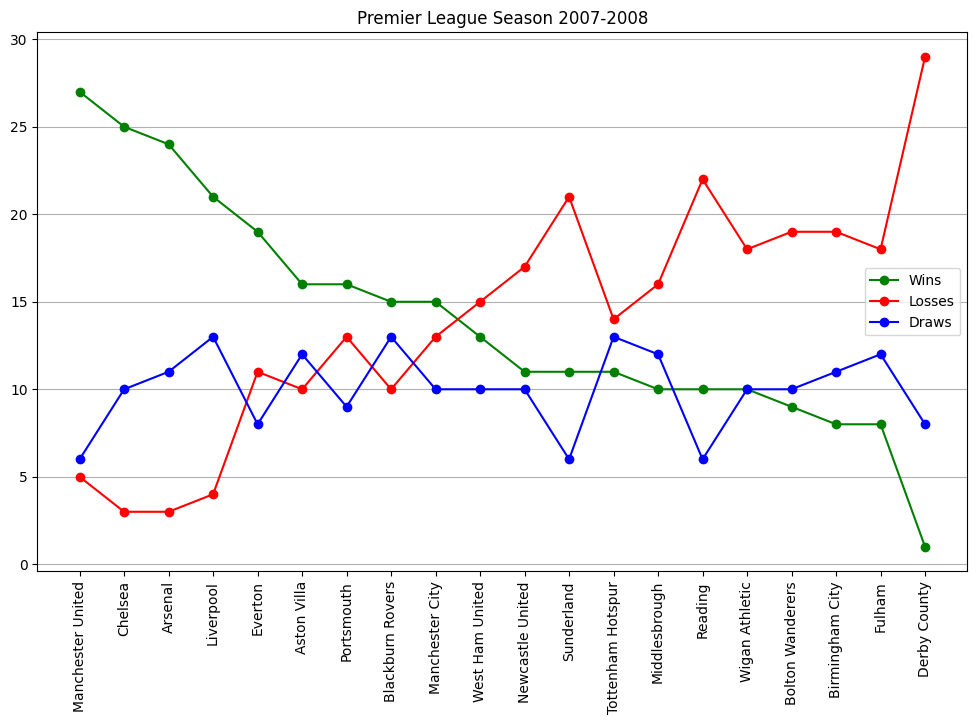

In [78]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(x,stats.wins, '-o', color='green', label='Wins')
ax.plot(x,stats.losses,'-o', color='red', label='Losses')
ax.plot(x,stats.draws,'-o', color='blue', label='Draws')
ax.set_xticks(x)
ax.set_xticklabels(label)
plt.xticks(rotation=90)
ax.set_title('Premier League Season 2007-2008')
ax.legend()
plt.grid(axis='y')
plt.show()

In [79]:
mu = stats[stats.team =='Manchester United']

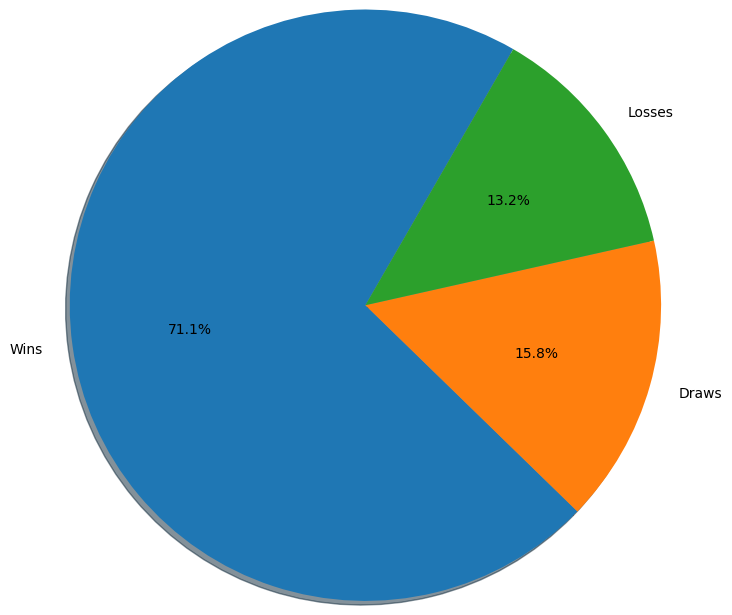

In [80]:
pie_label = ['Wins', 'Draws', 'Losses']
data = [mu.wins.values[0],mu.draws.values[0],mu.losses.values[0]]
plt.pie(data, labels = pie_label,autopct='%1.1f%%', shadow=True, startangle=60, radius=2)
plt.show()

In [82]:
res_mu = results[(results.home_team == 'Manchester United')|(results.away_team=='Manchester United')]

In [85]:
x = np.arange(len(res_mu))

In [86]:
goals, conceded = [], []
for i,row in res_mu.iterrows():
    if row.home_team == 'Manchester United':
        goals.append(row.home_goals)
        conceded.append(row.away_goals)
    else:
        goals.append(row.away_goals)
        conceded.append(row.home_goals)

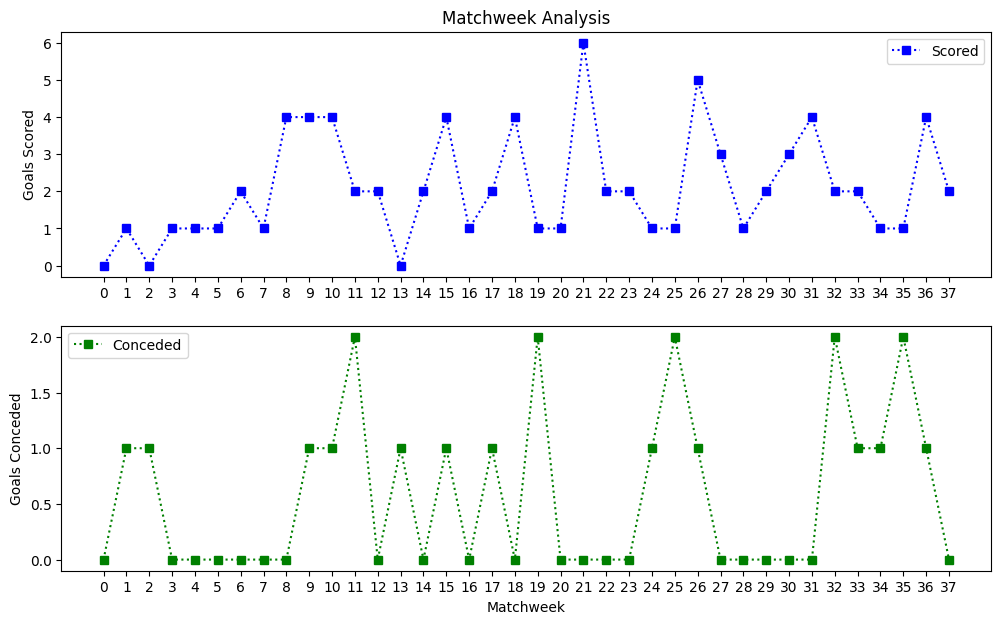

In [88]:
f,a = plt.subplots(2,1,figsize=(12,7))
a[0].plot(x,goals,':s',color='blue', label='Scored')
a[0].set_xticks(x)
a[0].set_ylabel('Goals Scored')
a[0].legend()
a[0].set_title('Matchweek Analysis')
a[1].plot(x,conceded,':s',color='green',label='Conceded')
a[1].set_xticks(x)
a[1].set_ylabel('Goals Conceded')
a[1].set_xlabel('Matchweek')
a[1].legend()

plt.show()